In [ ]:
# Makes a fake FITS frame for testing generation of pixel scale

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

In [2]:
fov = 33.2 # arcsec

# coordinates (arbitrary scale) of stars in Fig. 2 of Close+ 2012
coords_stars = {'D2': np.array([149, 401]), 
                'C2': np.array([507, 593]), 
                'B1': np.array([657, 104]), 
                'E1': np.array([822, 199]), 
                'A2': np.array([796, 328]), 
                'A1': np.array([798, 335])}

In [3]:
def inject_gaussians(readout, coords, sigma):
    x_coords, y_coords = np.meshgrid(np.arange(readout.shape[1]), np.arange(readout.shape[0]))
    for key, value in coords.items():
        x, y = value
        gaussian = np.exp(-((x_coords - x)**2 + (y_coords - y)**2) / (2 * sigma**2))
        readout += gaussian
    return readout

In [11]:
np.max(readout)

0.0

In [4]:
readout = np.zeros((1016, 1016))

In [5]:
_ = inject_gaussians(readout, coords=coords_stars, sigma=10)

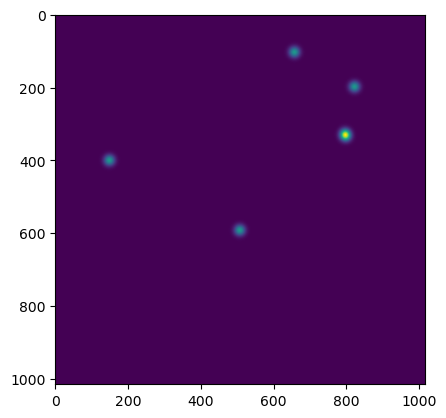

In [6]:
plt.imshow(readout)
plt.show()